In [256]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from pathlib import Path
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from typing import List, Optional

In [170]:
# IMPORT THE DATA
def dataset_builder(csv_dir: Path) -> DataFrame:
    """ Build a pandas dataset given a folder of CSVs

    Args:
        csv_dir: Path to the directory containing CSVs to be merged.   
    
    Returns:
        None
    """
    p = Path(csv_dir)
    files = p.rglob('*.csv')

    dfs = [pd.read_csv(f) for f in files]
    dfs = pd.concat(dfs, ignore_index=True)
    final_df = dfs.sample(frac=1, axis=0).reset_index(drop = True)

    return final_df

color_dataset = dataset_builder("./Color_data")

In [171]:
color_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   R           9000 non-null   float64
 1   G           9000 non-null   float64
 2   B           9000 non-null   float64
 3   color_name  9000 non-null   object 
 4   class       9000 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 351.7+ KB


In [172]:
color_dataset

,R,G,B,color_name,class
0,0.461,0.012,0.527,PINK,3
1,0.026,0.299,0.675,BLUE,7
2,0.494,0.045,0.461,PINK,3
3,0.296,0.353,0.351,LIGHT_BLUE,5
4,0.014,0.701,0.285,BLACK,8
...,...,...,...,...,...
8995,0.039,0.410,0.552,BLUE,7
8996,0.000,0.990,0.010,GREEN,6
8997,0.524,0.471,0.005,YELLOW,2
8998,0.503,0.368,0.128,ORANGE,1


In [198]:
# mappping of color and numerical class
color_class_dict = {0: "RED" ,
                    1: "ORANGE",
                    2: "YELLOW",
                    3: "PINK",
                    4: "WHITE",
                    5: "LIGHT_BLUE",
                    6: "GREEN",
                    7: "BLUE",
                    8: "BLACK"}

colors_list = [c for c in color_class_dict.values()]

In [174]:
# split into feautures and target
target = color_dataset[["class"]]
features = color_dataset[["R", "G", "B"]]

In [175]:
X = features.copy()
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [226]:
clf = DecisionTreeClassifier(max_depth = 4)
# We can also add an early stopping criteria to the tree e.g.
# clf = DecisionTreeClassifier(max_depth = 4) - The tree can only have a depth of three
clf = clf.fit(X_train, y_train)

In [227]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [228]:
predictions = clf.predict(X_test)
predictions

array([8, 4, 7, ..., 1, 0, 2], shape=(1800,))

In [229]:
print(classification_report(y_test, predictions, target_names=colors_list))

              precision    recall  f1-score   support

         RED       0.99      0.97      0.98       213
      ORANGE       0.95      0.98      0.96       203
      YELLOW       0.99      0.98      0.99       201
        PINK       1.00      1.00      1.00       204
       WHITE       0.69      0.82      0.75       187
  LIGHT_BLUE       0.77      0.62      0.69       181
       GREEN       1.00      1.00      1.00       214
        BLUE       0.99      0.99      0.99       207
       BLACK       0.98      0.99      0.99       190

    accuracy                           0.93      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.93      0.93      0.93      1800



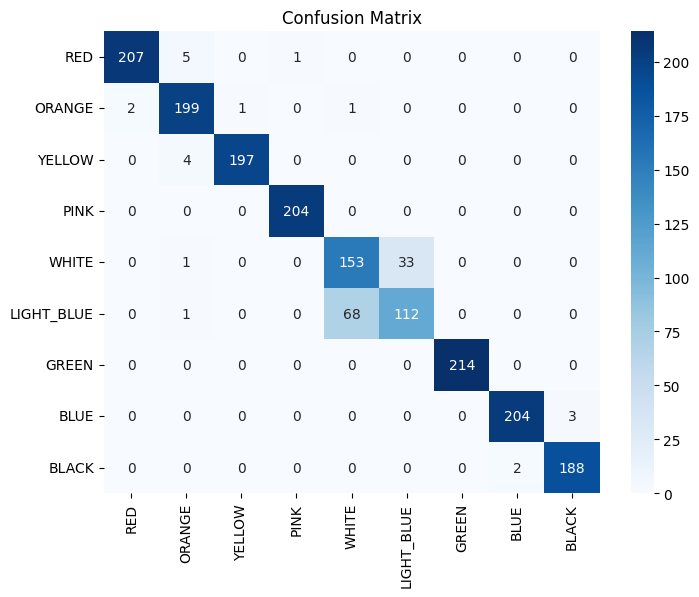

In [240]:
cm = confusion_matrix(y_test, predictions, labels=[i for i in range(9)])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=colors_list, yticklabels=colors_list)
plt.title('Confusion Matrix')
plt.show()

<Axes: >

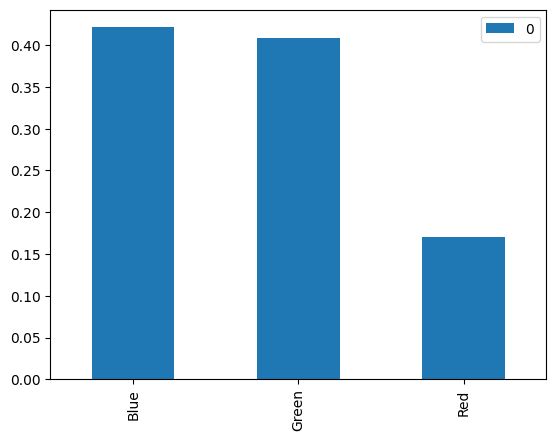

In [232]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = ["Red", "Green", "Blue"]).sort_values(0, ascending=False)
feature_importance.head(10).plot(kind='bar')

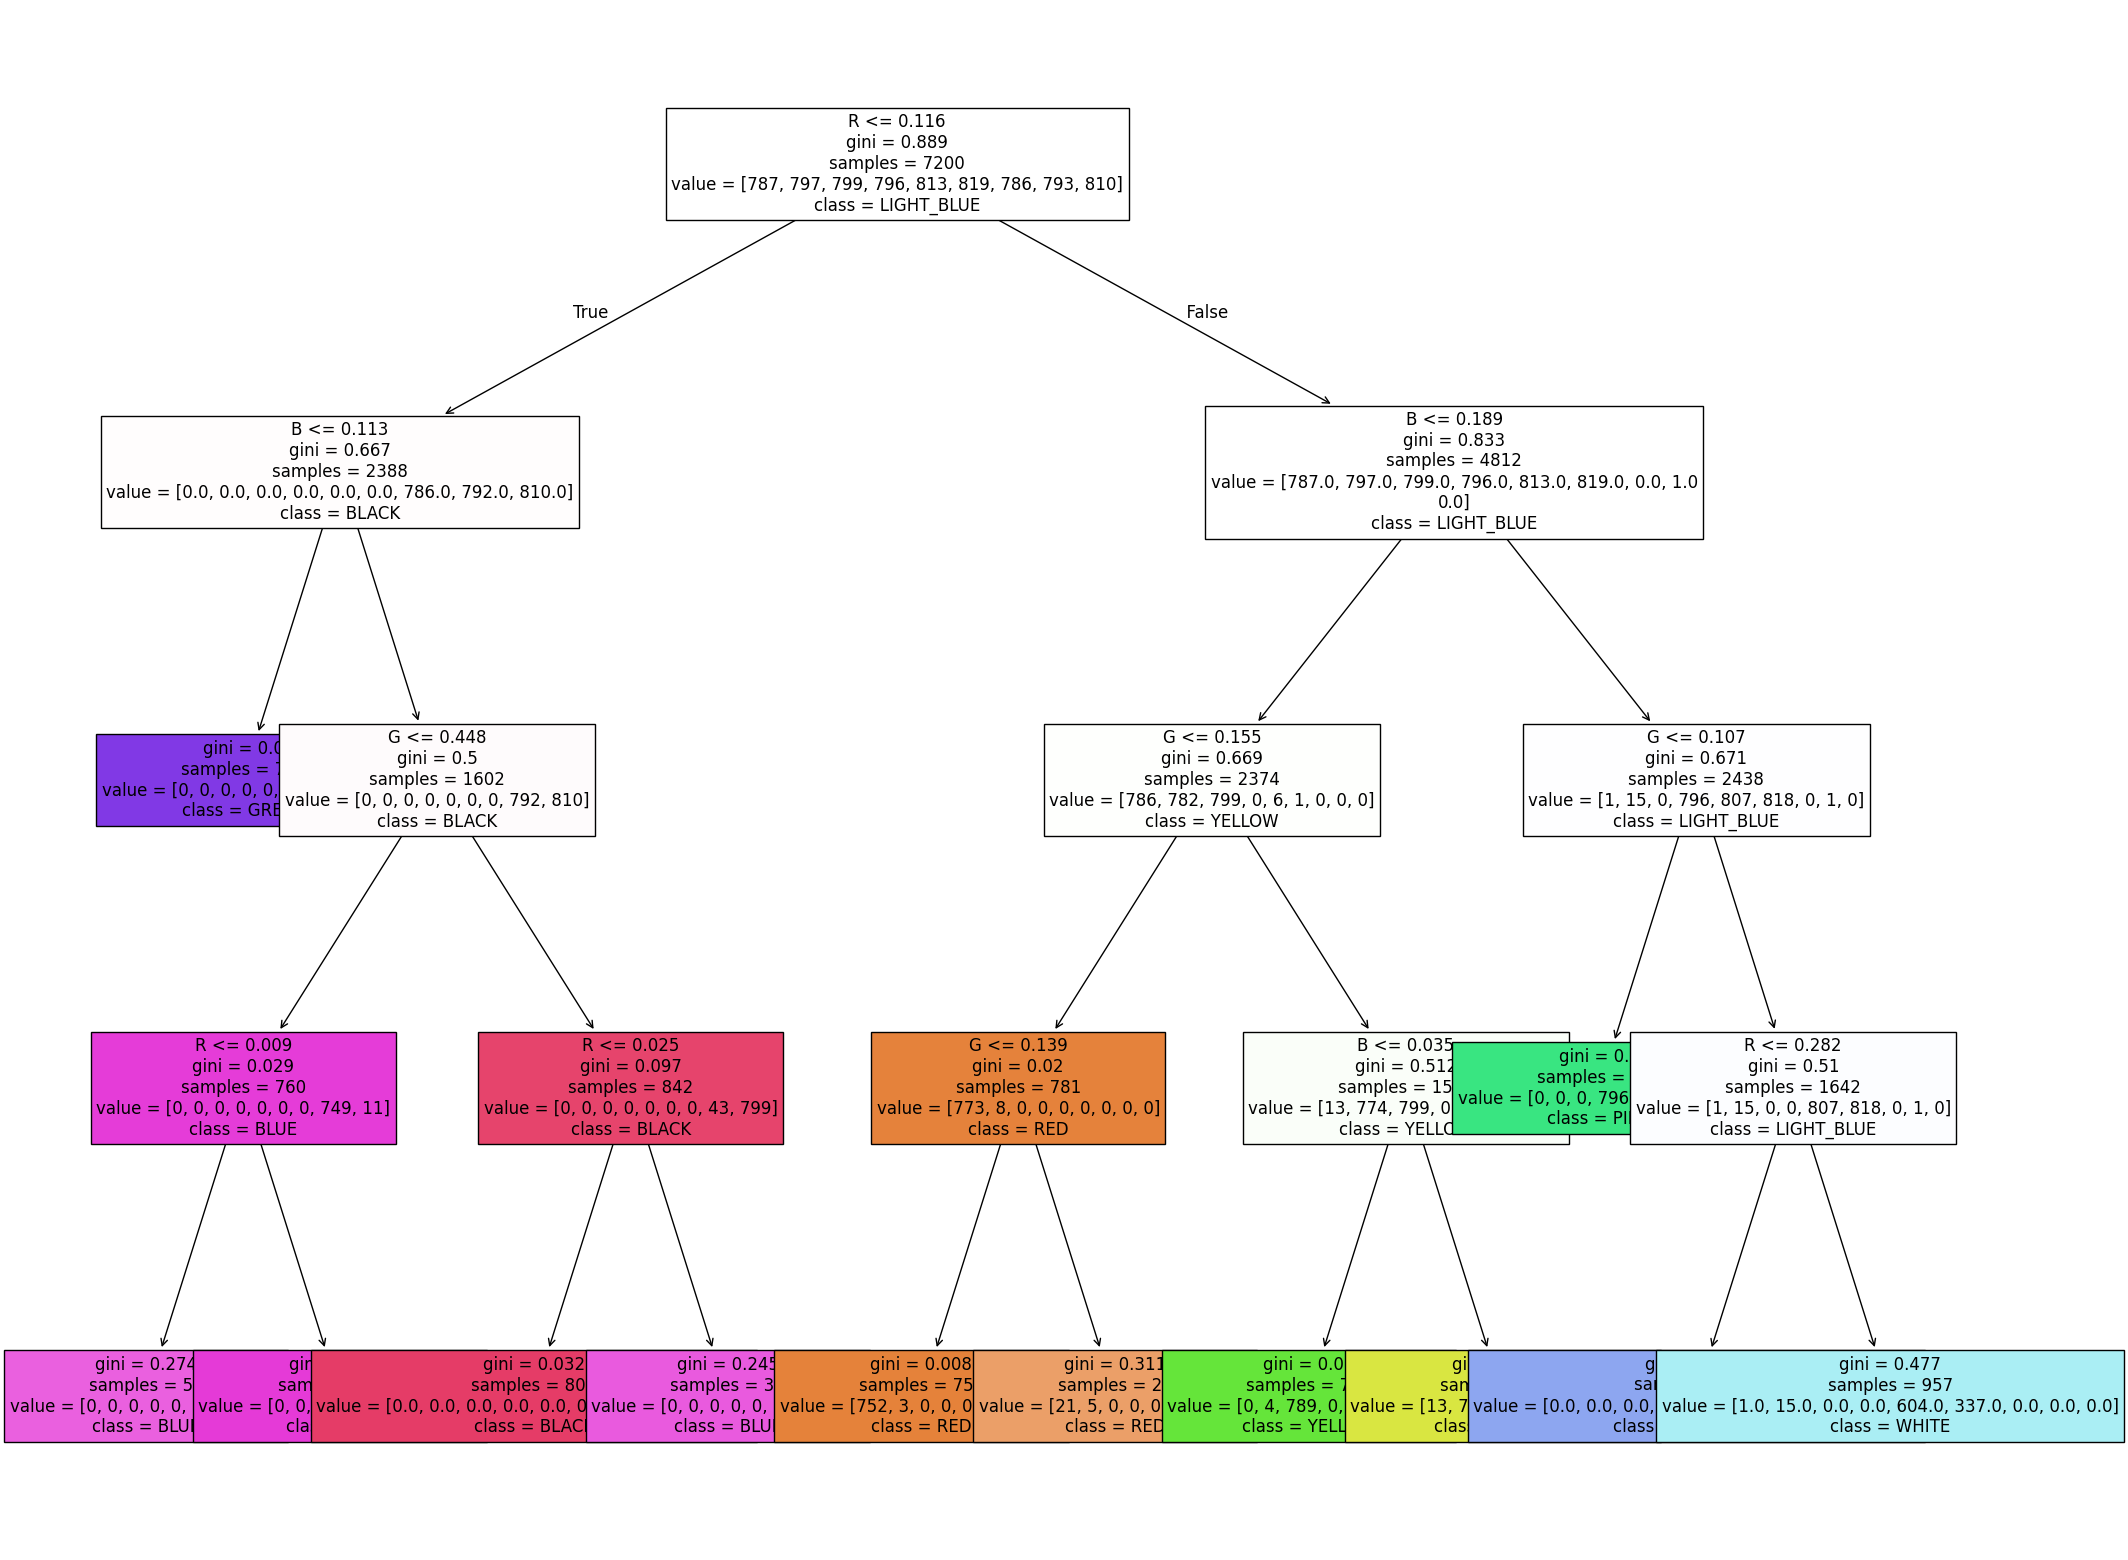

In [236]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=["R", "G","B"],
                   class_names=color_class_dict,
                   filled=True,
                   fontsize=12)

In [170]:
# Exporting the decision tree to C code
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] for i in tree_.feature]

    open_bracket = '{'
    close_bracket = '}'

    def recurse(node, depth):
        indent = "    " * depth
        
        # Node is not a leaf node
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            
            left = tree_.children_left[node]
            right = tree_.children_right[node]

            print(f"{indent}if ({name} <= {threshold:.4f}) {open_bracket}")
            recurse(left, depth + 1)

            print(f"{indent}{close_bracket} else {open_bracket}  // if {name} > {threshold:.4f}")
            recurse(right, depth + 1)

            print(f"{indent}{close_bracket}")
        else:
            one, zero = tree_.value[node][0]

            result = "true" if one > zero else "false"

            print(f"{indent}classification = {result};")
            
    recurse(0, 0)
    
tree_to_code(clf, X.columns)

NameError: name 'clf' is not defined